# Download Data

In [2]:
import os

# Set your target directory
target_dir = "../data/tnbc/"

# Create directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Download TN1 to TN8 into the target directory
for i in range(1, 9):
    filename = f"TN{i}.tar.gz"
    url = f"https://zenodo.org/records/7225578/files/{filename}?download=1"
    output_path = os.path.join(target_dir, filename)
    print(f"Downloading {filename} to {output_path}...")
    !curl -L -o "{output_path}" "{url}"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 63.1M  100 63.1M    0     0  8666k      0  0:00:07  0:00:07 --:--:-- 8918k 0  0:00:07  0:00:05  0:00:02 9621k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 58.3M  100 58.3M    0     0  4475k      0  0:00:13  0:00:13 --:--:-- 11.2Mk      0  0:00:17  0:00:12  0:00:05 8031k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 51.3M  100 51.3M    0     0  7657k      0  0:00:06  0:00:06 --:--:-- 8323k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 65.0M  100 65.0M    0     0  5030k      0  0:00:13 

In [3]:
import glob
import os

data_dir = "../data/tnbc"

for tar_path in glob.glob(os.path.join(data_dir, "*.tar.gz")):
    print(f"Extracting {tar_path}...")
    !tar -xvf "{tar_path}" -C "{data_dir}"

Extracting ../data/tnbc/TN7.tar.gz...
tar: Failed to set default locale
x TN7/
x TN7/cellclust_gt.csv
x TN7/reads_per_bin.csv
x TN7/dataframe.tsv
x TN7/binned_read_count_embedding.csv
x TN7/mut_map.csv
x TN7/cell_map.csv
Extracting ../data/tnbc/TN5.tar.gz...
tar: Failed to set default locale
x TN5/
x TN5/cellclust_gt.csv
x TN5/reads_per_bin.csv
x TN5/dataframe.tsv
x TN5/binned_read_count_embedding.csv
x TN5/mut_map.csv
x TN5/cell_map.csv
Extracting ../data/tnbc/TN1.tar.gz...
tar: Failed to set default locale
x TN1/
x TN1/cellclust_gt.csv
x TN1/reads_per_bin.csv
x TN1/dataframe.tsv
x TN1/binned_read_count_embedding.csv
x TN1/mut_map.csv
x TN1/cell_map.csv
Extracting ../data/tnbc/TN3.tar.gz...
tar: Failed to set default locale
x TN3/
x TN3/cellclust_gt.csv
x TN3/reads_per_bin.csv
x TN3/dataframe.tsv
x TN3/binned_read_count_embedding.csv
x TN3/mut_map.csv
x TN3/cell_map.csv
Extracting ../data/tnbc/TN6.tar.gz...
tar: Failed to set default locale
x TN6/
x TN6/cellclust_gt.csv
x TN6/reads_pe

In [1]:
!wget -O "/Users/samin/workspace/scWGS-Tumor-Phylogeny/data/tnbc/TN3/DeepCopyPrediction.csv"  https://raw.githubusercontent.com/elkebir-group/CNRein/refs/heads/main/examples/10x_TN3/finalPrediction/DeepCopyPrediction.csv

--2025-10-16 02:03:31--  https://raw.githubusercontent.com/elkebir-group/CNRein/refs/heads/main/examples/10x_TN3/finalPrediction/DeepCopyPrediction.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8000::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6692909 (6.4M) [text/plain]
Saving to: ‘/Users/samin/workspace/scWGS-Tumor-Phylogeny/data/tnbc/TN3/DeepCopyPrediction.csv’

/Users/samin/worksp 100%[===================>]   6.38M  38.2MB/s    in 0.2s    

2025-10-16 02:03:31 (38.2 MB/s) - ‘/Users/samin/workspace/scWGS-Tumor-Phylogeny/data/tnbc/TN3/DeepCopyPrediction.csv’ saved [6692909/6692909]



# View Data

In [56]:
ROOT_DIR = "../data/tnbc/TN3"

In [57]:
import pandas as pd
import numpy as np
import os

In [58]:
df_cell_map = pd.read_csv(os.path.join(ROOT_DIR, "cell_map.csv"))
df_cell_map

,cell_id,cell
0,0,TAACTTAGCTGGTTT
1,1,CCACTTCCAGTAGAA
2,2,ATATTATTTGCGTTT
3,3,CACTACCACGATACG
4,4,CAGATGGCTCCGTTC
...,...,...
1096,1096,AATCAAGCAATGGAC
1097,1097,AGCCGGTCTAGCAGC
1098,1098,TATCTATTTGCGATC
1099,1099,TTGTTCACTCCTACC


In [59]:
df_cellclust = pd.read_csv(os.path.join(ROOT_DIR, "cellclust_gt.csv"))
df_cellclust

,cell,cluster
0,784,1
1,946,1
2,410,1
3,674,1
4,553,1
...,...,...
1096,408,9
1097,795,9
1098,530,9
1099,769,9


In [60]:
df_cellclust = pd.merge(df_cellclust, df_cell_map.rename(columns={"cell": "cell_barcode"}), left_on="cell", right_on="cell_id", how="left")
df_cellclust

,cell,cluster,cell_id,cell_barcode
0,784,1,784,CCATCCTTGCAGCGA
1,946,1,946,CCAGGACGTTAAAAT
2,410,1,410,GTCTCCTCTGGGCGC
3,674,1,674,CATGGCCCAGTATGG
4,553,1,553,CGTCCGAGCTTCCCT
...,...,...,...,...
1096,408,9,408,CGCCTTCCCGAGCCC
1097,795,9,795,GTTGCGTGTGTCTTT
1098,530,9,530,GCGGGATCATTACGC
1099,769,9,769,CGGGGAACGCAATTC


In [61]:
dataframe = pd.read_csv(os.path.join(ROOT_DIR, "dataframe.tsv"), header=None, names=['chrom', 'snv_pos', 'cell_id', 'alt_base', 'alt', 'total'], sep='\t', index_col=False)
dataframe

,chrom,snv_pos,cell_id,alt_base,alt,total
0,chr1,10203,427,T,0,1
1,chr1,10203,781,T,0,2
2,chr1,10203,153,T,1,1
3,chr1,10203,29,T,0,2
4,chr1,10203,446,T,1,1
...,...,...,...,...,...,...
280758,chrY,8933,932,A,1,1
280759,chrY,8933,440,A,1,1
280760,chrY,8933,767,A,0,1
280761,chrY,8933,587,A,0,1


In [62]:
df_deepcopy = pd.read_csv(f"{ROOT_DIR}/DeepCopyPrediction.csv")
df_deepcopy

,Cell barcode,Chromosome,Start,End,Haplotype 1,Haplotype 2
0,CTAGCCTCACGATGGA,1,800001,29200000,1,2
1,CTAGCCTCACGATGGA,1,29200001,51600000,2,1
2,CTAGCCTCACGATGGA,1,51600001,80700000,2,1
3,CTAGCCTCACGATGGA,1,80700001,109300000,1,2
4,CTAGCCTCACGATGGA,1,109300001,121600000,3,2
...,...,...,...,...,...,...
160495,GTTCGGGTCTAGAACC,20,61800001,64300000,2,2
160496,GTTCGGGTCTAGAACC,21,9000001,14300000,1,1
160497,GTTCGGGTCTAGAACC,21,14300001,46600000,1,1
160498,GTTCGGGTCTAGAACC,22,16000001,24400000,1,1


In [64]:
print(df_deepcopy["Cell barcode"].str.len().unique(), df_cell_map["cell"].str.len().unique())

[16] [15]


In [17]:
df_deepcopy['total_cn'] = df_deepcopy["Haplotype 1"] + df_deepcopy["Haplotype 2"]
df_deepcopy["position"] = df_deepcopy["Chromosome"].astype(str) + ":" +  df_deepcopy["Start"].astype(str) + ":" + df_deepcopy["End"].astype(str)
df_cn = (
    df_deepcopy
    .pivot(index="Cell barcode", columns="position", values="total_cn")
)
df_cn

position,10:100001:20700000,10:110000001:131300000,10:131300001:132600000,10:132600001:133600000,10:20700001:47400000,10:48200001:51100000,10:51100001:77600000,10:77600001:110000000,11:102900001:135000000,11:200001:21400000,...,8:2800001:14000000,8:39000001:40000000,8:40000001:43900000,8:46000001:66100000,8:66100001:87100000,8:87100001:109000000,9:100800001:138100000,9:200001:34000000,9:34000001:65500000,9:68400001:100800000
Cell barcode,,,,,,,,,,,,,,,,,,,,,
AAACGGGAGTAGGTGC,3,3,4,4,3,5,3,3,4,4,...,2,1,3,4,4,4,3,2,4,3
AAAGCAAGTGTCAACT,3,3,4,4,3,5,3,3,4,4,...,2,1,3,4,4,4,3,2,4,3
AAAGTAGGTGTCTAAC,3,3,4,4,3,5,3,3,4,4,...,2,1,3,4,4,4,3,2,4,3
AAATGCCGTGACCCGT,3,3,4,4,3,5,3,3,4,4,...,2,1,3,4,4,4,3,2,4,3
AACACGTCATATCGCA,3,3,4,4,3,5,3,3,4,4,...,2,1,3,4,4,4,3,2,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGCGCAGGCTCAGA,3,3,4,4,3,5,3,3,4,4,...,2,1,3,4,4,4,3,2,4,3
TTTGCGCGTCTGATAC,3,3,4,4,3,5,3,3,4,4,...,2,1,3,4,4,4,3,2,4,3
TTTGGTTCACAGCTGC,3,3,4,4,3,5,3,3,4,4,...,2,1,3,4,4,4,3,2,4,3


In [18]:
import sys
sys.path.append("..")

In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import importlib
import src.phylogeny_utils

importlib.reload(src.phylogeny_utils)

<module 'src.phylogeny_utils' from '/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py'>

In [30]:
from src.phylogeny_utils import plot_spectral_clustering

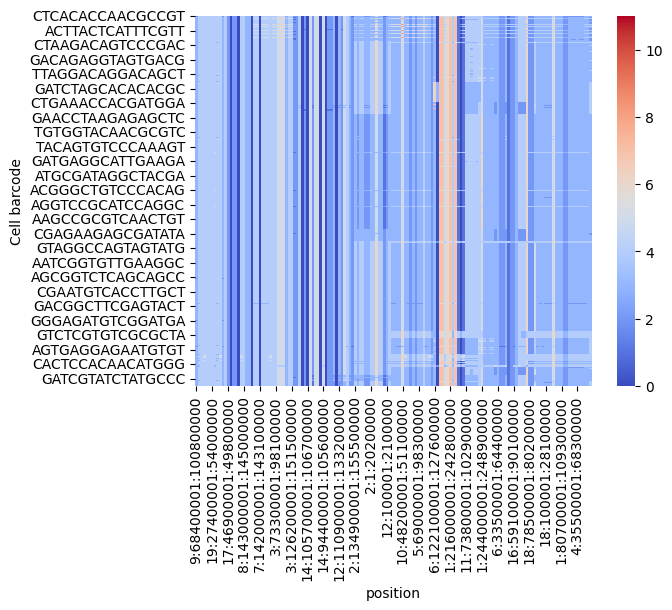

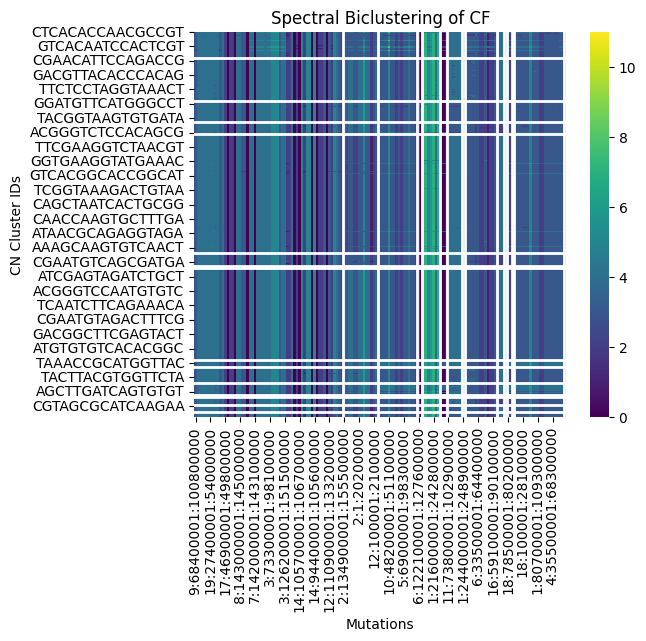

In [37]:
plot_spectral_clustering(df_cn, n_clusters=15)

In [8]:
(df_deepcopy["End"] - df_deepcopy["Start"] + 1).unique()

array([28400000, 22400000, 29100000, 28600000, 12300000, 43900000,
       20700000, 26400000, 26800000,  1200000,  4900000, 20200000,
       25500000, 29000000, 29200000, 26100000,  3600000, 20600000,
       32800000, 28800000, 23700000,  1300000, 32900000, 20100000,
       20300000, 24800000, 28100000, 25300000, 28000000, 18600000,
       35400000,  1100000, 33100000, 30300000, 28200000,  1600000,
       30500000, 36900000, 29300000, 20500000, 21200000, 20400000,
       20900000, 28300000,  5000000, 30900000, 37300000,  5500000,
        1000000, 34800000,  3700000,  3500000, 42500000, 30700000,
       38000000, 16200000,  2600000, 11200000, 25000000,  3900000,
       21000000, 21900000, 34000000,  2000000, 33800000, 31500000,
       32400000, 26700000,  2900000, 26500000, 21300000, 22000000,
       30400000, 32100000,  5800000,  2500000, 24300000, 29500000,
        4000000, 39000000, 22300000, 40600000, 28500000,  2200000,
       26000000, 23000000, 24000000,  1500000,  8100000, 33400